## Projeto de Recursos Humanos com Power BI e Python

## Definição do Problema

A empresa ZuZa Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

- Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
- Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
- Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
- Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
- Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
- Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
- Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

Seu trabalho é limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.

In [1]:
# Verificando a versão do Python

from platform import python_version
print('Versão do Python utilizada neste projeto é', python_version())

Versão do Python utilizada neste projeto é 3.9.7


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Importando os pacotes que iremos utilizar no projeto

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Verificando as versões instaladas

%reload_ext watermark
%watermark -a "Data Science" --iversions

Author: Data Science

pandas    : 1.3.4
json      : 2.0.9
seaborn   : 0.11.2
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.20.3
matplotlib: 3.4.3



### Carregando os dados

In [7]:
dadosRH = pd.read_csv('dadosRH.csv')

In [8]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [11]:
dadosRH.tail()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
54803,3030,Tecnologia,Sudeste,Superior,M,Outsourcing,1,48,3.0,17,0
54804,74592,Logistica,Nordeste,Mestrado ou Doutorado,F,Outro,1,37,2.0,6,0
54805,13918,Analytics,Sudeste,Superior,M,Outro,1,27,5.0,3,0
54806,13614,Marketing,Nordeste,NaN,M,Outsourcing,1,29,1.0,2,0
54807,51526,RH,Nordeste,Superior,M,Outro,1,27,1.0,5,0


In [10]:
dadosRH.shape

(54808, 11)

### Analise exploratória, limpeza e transformação dos dados

In [12]:
dadosRH.isnull()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False


In [13]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [14]:
# Chegar os dados nulos

# Agrupar por uma coluna especifica, colocado entre [] o nome da coluna

dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


O agrupamento acima não esta levando em consideração os valores ausentes. Tirando a dúvida, somar a coluna id_funcionario = 805 + 1492 + 36669 = 52399 no shape lá em cima fala que temos 54808

<AxesSubplot:xlabel='educacao', ylabel='count'>

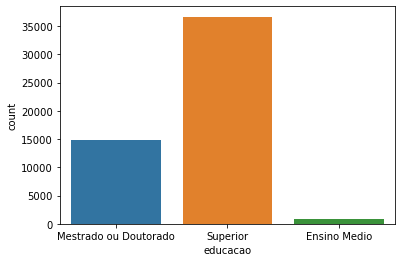

In [16]:
# Vamos visualizar em grafico utilizando o Countplot

sns.countplot(x= dadosRH['educacao'])

In [17]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

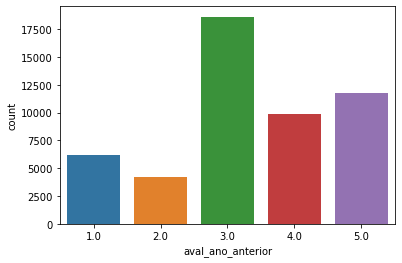

In [18]:
sns.countplot(x= dadosRH['aval_ano_anterior'])

Vamos aplicar imputação e preencher os valores ausentes

In [19]:
# Preencher os valores utilizando a estatistica MODA

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace= True)

# fillna = FILL = preencher, NA = vazio / ausente
# apos abre o parenteses para dizer com o que vou preencher, no caso acima com a MODA
# Entre cochete o indice 0 fala para trazer o maior valor
# inplace manda salvar o resultado na propria tabela 

In [20]:
# Preencher os valores ultilizando a estatistica MEDIANA

dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace= True)

# fillna = FILL = preencher, NA = vazio / ausente
# apos abre o parenteses para dizer com o que vou preencher, no caso acima com a MEDIANA
# inplace manda salvar o resultado na propria tabela 

In [21]:
# Chegar de ainda tem valor nulos

dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [22]:
# Verificar o agrupamento, agora com dados completos

dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


O agrupamento acima agora esta somando tudo, pois não tem valores ausentes. Tirando a dúvida, somar a coluna id_funcionario = 805 + 14925 + 39078 = 54808 no shape lá em cima fala que temos 54808

In [23]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


Verificar o balanceamento de classe na variável "promovido"

In [24]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

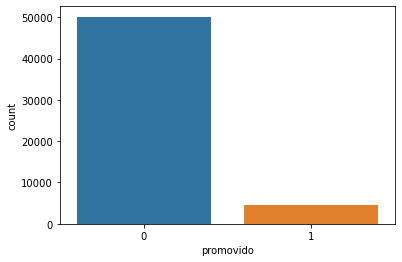

In [26]:
sns.countplot(x= dadosRH['promovido'])

Utilizar preenchimento automaticos para balancear os promovidos para quando formos trabalhar com machine termos já uma classa balanceada. Repare que temos mais não promovido do que promovido, muito desequilibrante para uma criação de modelo que teria a tendencia de não analisar corretamento, pois tem mais dados de não promovido.

In [27]:
# Separar as classe maior e menor do conjunto de dados

df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [28]:
# Verificando a classe maior

df_classe_majoritaria.shape

(50140, 11)

In [29]:
# verificando a classe menor

df_classe_minoritaria.shape

(4668, 11)

Utilizar a tecnica de reamostragem. Poderiamos neste problema deletar dados da maior classe para ficar pareado com a menor classe, porem teriamos que tirar muitos dados. Desidir acrescentar dados na menor classe para aquiparar "balancear".

In [34]:
# Acrescentar dados na classe menor utilizando o tecnica Upsample

from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria,
                                            replace= True,
                                            n_samples= 50140,
                                            random_state= 150)

# replace = mandando gravar na propria tabela
#n_samples = o tamanho que desejo para menor classe, foi colocado igual a maior
#random_state = repetir resultado

In [35]:
# Concatenar as classe criada com a existente maior

dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [36]:
# Contar a quantidade de registro para cada variável

dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [37]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot:xlabel='promovido', ylabel='count'>

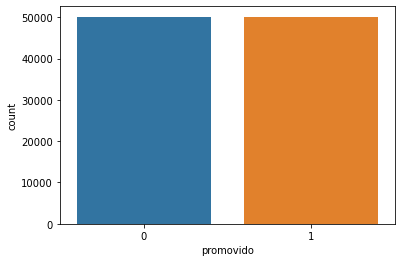

In [39]:
sns.countplot(x= dadosRH_balanceados['promovido'])

In [40]:
# Salvando o dataset manipulado

dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding= 'utf-8', index= False)

Agora vamos importar os dados do arquivo criado

In [41]:
# Carregar os dados em uma variável

dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [42]:
dataset.tail()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
100275,17132,Analytics,Norte,Superior,M,Outro,1,27,3.0,1,1
100276,75177,Logistica,Sul,Superior,M,Outsourcing,2,47,5.0,6,1
100277,74185,Logistica,Norte2,Superior,M,Outsourcing,1,30,3.0,5,1
100278,5261,Contabilidade,Sul,Superior,M,Outsourcing,1,29,2.0,4,1
100279,31200,Contabilidade,Nordeste,Mestrado ou Doutorado,F,Outro,1,33,5.0,5,1


In [43]:
dataset.shape

(100280, 11)

## Respondendo as perguntas e preparando os dados para o PowerBI
Cada pergunta estou importando as bibliotecas para facilitar no PowerBI pois é necessario para cada grafico

Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

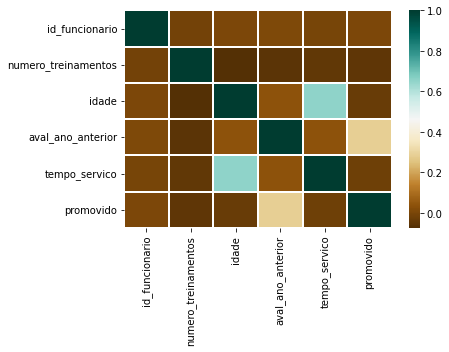

In [49]:
# Grafico de correlação entre a variavel com outras veriaveis do conjunto de dados

import matplotlib.pyplot as plt
import seaborn as sns

#Importando os dados

corr = dataset.corr()

# Personalizar o grafico

sns.heatmap(corr, cmap= "BrBG", linewidths= 0.1)

plt.show()

# cmap = mapa de cor - https://matplotlib.org/stable/gallery/color/colormap_reference.html
# linewidths = largura da linha

Obs. Na base de dados temos variaveis númerias e categoricas, no exemplo não estamos diferenciando os tipos de variaveis.

A matriz de correlação é utilizado para veriaveis númericas
E matriz de associação para veriaveis categoricas

No exemplo acima utilizando correlação pois todas as variaveis são números, não quer dizer que esta certo. O correto é classificar e utilizar a matriz correta.

Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


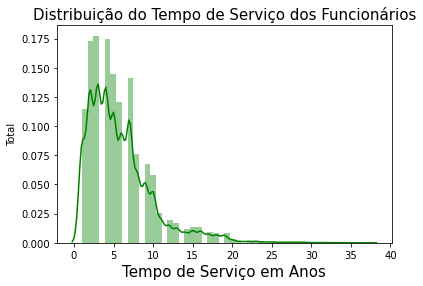

In [57]:
# Grafico de distribuição

import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

sns.distplot(a= dataset['tempo_servico'],  color= 'green')

# Personalizar o grafico

plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize= 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize= 15)
plt.ylabel('Total')

plt.show()

Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

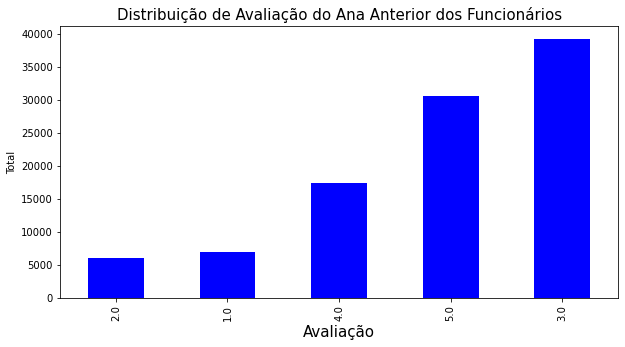

In [54]:
# Grafico de barras

import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color= 'blue', figsize= (10, 5))

# Contei os elementos na veriavel e ordenei sort_values por padrão do menor para o maior
# para inverter a ordem utilizar entre parenteses ascending=False

# Personalizar o grafico

plt.title('Distribuição de Avaliação do Ana Anterior dos Funcionários', fontsize= 15)
plt.xlabel('Avaliação', fontsize= 15)
plt.ylabel('Total')

plt.show()

Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

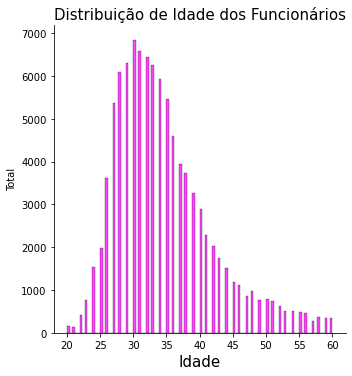

In [65]:
# Grafico distribuição

import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

sns.displot(data= dataset['idade'], color= 'magenta')

# Personalizar o grafico

plt.title('Distribuição de Idade dos Funcionários', fontsize= 15)
plt.xlabel('Idade', fontsize= 15)
plt.ylabel('Total')

plt.show()

Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

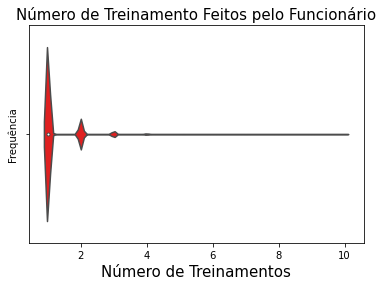

In [63]:
# Grafico violino

import matplotlib.pyplot as plt
import seaborn as sns

# Importar dados

sns.violinplot(x= dataset['numero_treinamentos'], color= 'red')

# Personalizar grafico

plt.title('Número de Treinamento Feitos pelo Funcionário', fontsize= 15)
plt.xlabel('Número de Treinamentos', fontsize= 15)
plt.ylabel('Frequência')

plt.show()

 Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

In [66]:
# Explorando a veriavel canal de recutamento

dataset.groupby(['canal_recrutamento']).sum()

,id_funcionario,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
canal_recrutamento,,,,,,
Indicado,103583626,3020,82987,9844.0,12424,1543
Outro,2158890817,68393,1926360,197806.0,324051,27485
Outsourcing,1669767154,51756,1459855,151856.0,244322,21112


Temos 3 possibilidade em canal de recrutamento

In [67]:
# Contar a quantidade de cada possibilidade

dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

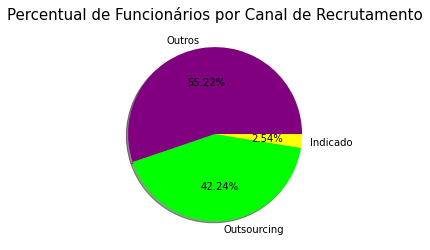

In [71]:
# Grafico pizza

import matplotlib.pyplot as plt
import seaborn as sns

# trabalhando os dados

fatias = [55375, 42358, 2547]
labels = 'Outros', 'Outsourcing', 'Indicado'
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0]

plt.pie(fatias, labels= labels, colors= colors, explode= explode, shadow= True, autopct=  "%.2f%%")

# Personalizar grafico

plt.title('Percentual de Funcionários por Canal de Recrutamento', fontsize= 15)
plt.axis('off')
#plt.legend()
plt.show()

Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

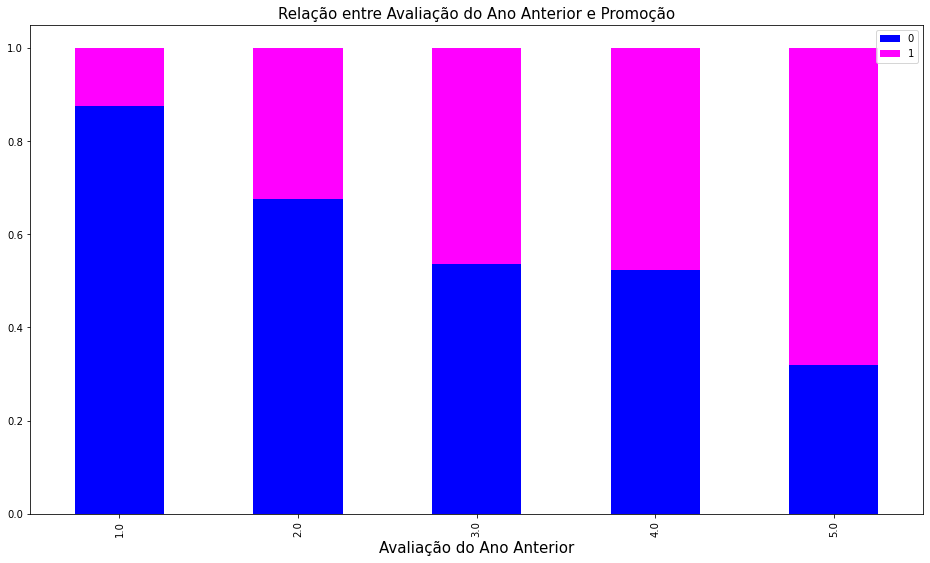

In [72]:
# Grafico tabela cruzada, para avaliar 3 possibilidade
# A variavel Promoção é Categorica só tem 0 e 1
# A variavel Avaliação é numerica, podendo ter numeros de 1 a 5

import matplotlib.pyplot as plt
import seaborn as sns

# Importar dados

data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis= 0).plot(kind= 'bar',
                                                stacked=  True,
                                                figsize= (16, 9),
                                                color= ['blue', 'magenta'])

# Personalizar grafico

plt.title('Relação entre Avaliação do Ano Anterior e Promoção', fontsize= 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize= 15)
plt.legend()

plt.show()

Quando a avaliação foi 1, o numero de não promovido é maior(em azul = 0)
Quando a avaliação foi 5, o numero de promovido é maior(em rosa  = 1)
Na média avaliação entre 3 e 4 a promoção é equivalente.

In [74]:
# Tabela cruzada do grafico acima

data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data

promovido,0,1
aval_ano_anterior,,
1.0,6135,878
2.0,4044,1937
3.0,21048,18223
4.0,9093,8264
5.0,9820,20838


### Grafico em 3D

Criando um exemplo de grafico em 3D com Plotly
https://plotly.com/graphing-libraries/

In [78]:
# Primeiro precisa instalar o Plotly - https://plotly.com/python/getting-started/

# Imports

import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.svm import SVR

In [76]:
# Importa o dataset de exemplo que acompanha o plotly

dataset = px.data.iris()

In [77]:
# Ver do dados
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [79]:
# Parâmetros

mesh_size = .02
margin = 0

In [80]:
# Dataset

df = px.data.iris()

In [81]:
# Variáveis

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

In [82]:
# Cria o modelo de Machine Learning

modelo = SVR(C=1.)

In [83]:
# Treina o modelo

modelo.fit(X, y)

SVR()

In [84]:
# Mesh grid para mostrar o resultado do modelo

x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

In [85]:
# Previsões com o modelo

pred = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

In [86]:
# Gera o plot 3D
fig = px.scatter_3d(df, x = 'sepal_width', y = 'sepal_length', z = 'petal_width')
fig.update_traces(marker = dict(size=5))
fig.add_traces(go.Surface(x = xrange, y = yrange, z = pred, name = 'pred_surface'))
fig.show()